In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We take Emma by Jane Austen, parse it, convert it to a tf-idf matrix, then run a PCA on it (using the TruncatedSVD command so that it won't center the data and remove sparsity).  Then we'll  look at the relationship between a few words and the set of topics/components.

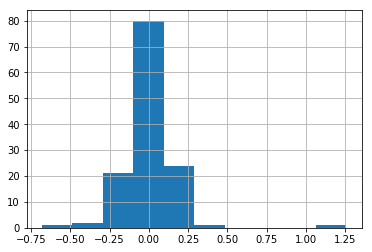

In [2]:
from nltk.corpus import gutenberg
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

# Creating the tf-idf matrix.
vectorizer = TfidfVectorizer()
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)

# Generating 130 topics.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
emma_paras_lsa = lsa.fit_transform(emma_paras_tfidf)

# Getting the word list.
terms = vectorizer.get_feature_names()

# Loading scores for each word on each topic/component.
words_by_topic=emma_paras_tfidf.T * emma_paras_lsa

# Linking the loadings to the words in an easy-to-read way.
components=pd.DataFrame(words_by_topic,index=terms)

components.loc['marriage'].hist()
plt.show()

* 1 = high positive loading, or correlation
* 0 = no correlation
* -1 = ?